In [ ]:
!python -m pip install basemap
import pandas as pd
import requests
import json
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import datetime, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit

plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


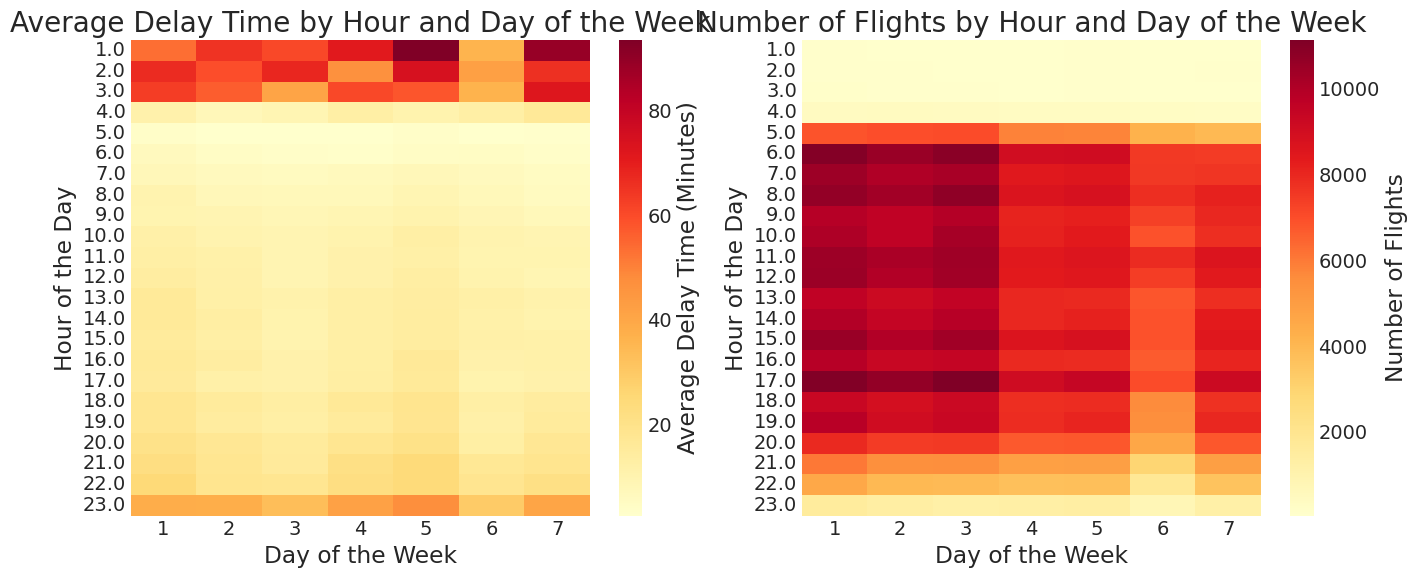

In [ ]:
# HEATMAPS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("output.csv")

# Creates a new column called "DepTime_hour", which contains the hour of the day for each flight's departure time
# The "pd.to_datetime" function converts the "DepTime" column (which contains the departure time in the format "HHMM") to a datetime object, 
# and the ".dt.hour" attribute extracts the hour component from the datetime object.
data['DepTime_hour'] = pd.to_datetime(data['DepTime'], format='%H%M', errors='coerce').dt.hour 

# Create a pivot table (data summarization tool) with the average delay time by hour and day
# Ttable shows the average delay time in minutes for each combination of hour of the day and day of the week
delays_by_hour_day = data.pivot_table(values='ArrDelayMinutes', index='DepTime_hour', columns='DayOfWeek', aggfunc='mean')

# Create a pivot table with the count of flights by hour and day
# shows the number of flights for each combination of hour of the day and day of the week.
flights_by_hour_day = data.pivot_table(values='Flight', index='DepTime_hour', columns='DayOfWeek', aggfunc='count')

# Create a pivot table with the top 10 origin airports by number of flights
top_origins = data.pivot_table(values='Flight', index='OriginCityName', aggfunc='count').sort_values(by='Flight', ascending=False).head(10)['Flight']

# Subset the data to only include flights from the top 10 origin airports
# data_top_origins = data[data['OriginCityName'].isin(top_origins.index)]

# Create a pivot table with the count of flights by origin airport and airline
# flights_by_origin_airline = data_top_origins.pivot_table(values='Flight', index='OriginCityName', columns='Airline', aggfunc='count')

# Sets the background of the Seaborn plots to be a white 
sns.set_style("white")

# Create a 1x2 grid of subplots
# creates a figure with a 1x2 grid of subplots (i.e., two plots side by side)
# The "ax" variable contains a list of the two subplot axes
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the heatmap of the average delay time
sns.heatmap(delays_by_hour_day, cmap='YlOrRd', ax=ax[0], cbar_kws={'label': 'Average Delay Time (Minutes)'})
ax[0].set_title('Average Delay Time by Hour and Day of the Week')
ax[0].set_xlabel('Day of the Week')
ax[0].set_ylabel('Hour of the Day')

# Plot the heatmap of the count of flights
sns.heatmap(flights_by_hour_day, cmap='YlOrRd', ax=ax[1], cbar_kws={'label': 'Number of Flights'})
ax[1].set_title('Number of Flights by Hour and Day of the Week')
ax[1].set_xlabel('Day of the Week')
ax[1].set_ylabel('Hour of the Day')

# YlOrRd  YlGnBu  BrBG  GnBu_r

# Set the layout of the subplots
plt.tight_layout()

# Display the plot
plt.show()


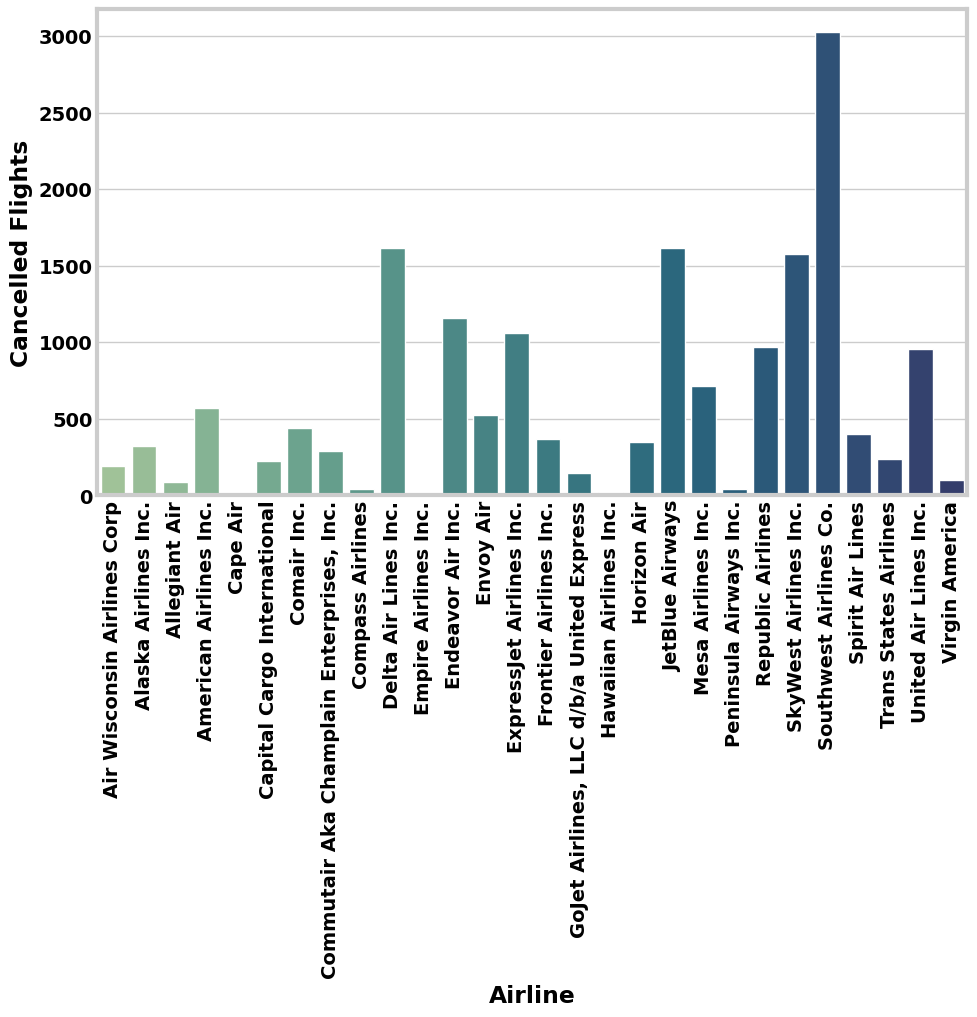

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# data = pd.read_csv("output.csv")
# # Create contingency table
# # A contingency table is a tabular summary of the relationship between two or more categorical variables.
# # Create a contingency table using pandas crosstab function to calculate the frequency of cancelled flights by airline. 
# # The 'Airline' column is used as the rows and the 'Cancelled' column is used as the columns.
# ct_airline_cancelled = pd.crosstab(data['Airline'], data['Cancelled'])

# # Set the size of the figure
# fig, ax = plt.subplots(figsize=(6,4))

# # Generate shades of blue according to height
# num_shades = ct_airline_cancelled.shape[0]  # Number of rows in the contingency table (i.e. number of airlines)
# blue_palette = sns.color_palette('Blues', n_colors=num_shades)

# # Plot bar chart with blue palette
# sns.set_style('whitegrid')
# sns.barplot(x=ct_airline_cancelled.index, y=ct_airline_cancelled[1], ax=ax, palette="crest")
# plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees for better readability
# plt.xlabel('Airline')
# plt.ylabel('Cancelled Flights')
# plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("output.csv")
# Create contingency table
# A contingency table is a tabular summary of the relationship between two or more categorical variables.
# Create a contingency table using pandas crosstab function to calculate the frequency of cancelled flights by airline. 
# The 'Airline' column is used as the rows and the 'Cancelled' column is used as the columns.
ct_airline_cancelled = pd.crosstab(data['Airline'], data['Cancelled'])

# Set the size of the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Generate shades of blue according to height
num_shades = ct_airline_cancelled.shape[0]  # Number of rows in the contingency table (i.e. number of airlines)
blue_palette = sns.color_palette('Blues', n_colors=num_shades)

# Plot bar chart with blue palette
sns.set_style('whitegrid')
sns.barplot(x=ct_airline_cancelled.index, y=ct_airline_cancelled[1], ax=ax, palette="crest")
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees for better readability
plt.xlabel('Airline', fontweight='bold', color='black')
plt.ylabel('Cancelled Flights', fontweight='bold', color='black')
plt.xticks(fontweight='bold', color='black')
plt.yticks(fontweight='bold', color='black')
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Load data from CSV file
df = pd.read_csv("output.csv")

# Filter data to only include necessary columns
df = df[["OriginIataCode", "OriginLatitude", "OriginLongitude", "OriginStateName", "OriginCityName"]]

# Group data by airport code and count number of flights
df = df.groupby(["OriginIataCode", "OriginLatitude", "OriginLongitude", "OriginStateName", "OriginCityName"]).size().reset_index(name="count")

# Create a new column that combines OriginIataCode with OriginStateName or OriginCityName
df["OriginLabel"] = df["OriginIataCode"] + " (" + df["OriginCityName"] + ", " + df["OriginStateName"] + ")"

# Create bubble map using plotly
fig = px.scatter_mapbox(df, lat="OriginLatitude", lon="OriginLongitude", size="count", color="OriginIataCode", zoom=3,
                        hover_name="OriginLabel", hover_data={"count": True, "OriginLatitude": False, "OriginLongitude": False},
                        mapbox_style="open-street-map")
# count value displayed when you hover over a bubble represents the number of flights that departed from that airport.

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [ ]:
data = pd.read_csv("output.csv")
print('Dataframe dimensions:', data.shape)

# Drop unwanted columns
data = data.drop(['Cancelled','Diverted','CRSDepTime','DepTime','DepDelayMinutes','DepDelay','DepDel15',
                 'CRSArrTime','ArrTime','ArrDelayMinutes','ArrDelay','ArrDel15','AirTime','CRSElapsedTime',
                 'ActualElapsedTime','Distance','Month','DayOfWeek','OriginStateName',
                 'DestCityName','DestStateName','TaxiOut','TaxiIn','DivAirportLandings'], axis=1)
data.head()

Dataframe dimensions: (1048575, 30)


,Airline,Flight,OriginCityName,OriginIataCode,OriginLatitude,OriginLongitude
0,Endeavor Air Inc.,9E_N8928A_3298,Albany,ALB,42.748299,-73.801697
1,Endeavor Air Inc.,9E_N800AY_3298,Albany,ALB,42.748299,-73.801697
2,Endeavor Air Inc.,9E_N8836A_3298,Albany,ALB,42.748299,-73.801697
3,Endeavor Air Inc.,9E_N800AY_3298,Albany,ALB,42.748299,-73.801697
4,Endeavor Air Inc.,9E_N8839E_3298,Albany,ALB,42.748299,-73.801697


In [ ]:
# Gives some infos on columns types and number of null values
tab_info=pd.DataFrame(data.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(data.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(data.isnull().sum()/data.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

,Airline,Flight,OriginCityName,OriginIataCode,OriginLatitude,OriginLongitude
column type,object,object,object,object,float64,float64
null values (nb),0,0,0,58260,58260,58260
null values (%),0.0,0.0,0.0,5.556112,5.556112,5.556112


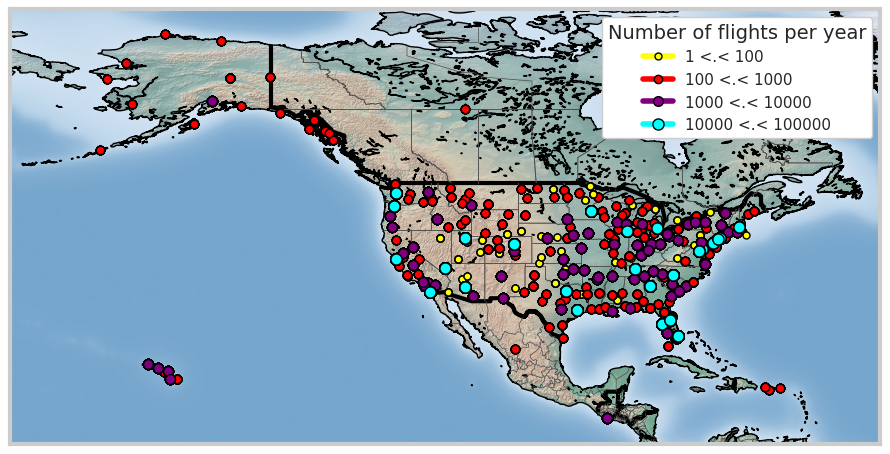

['ALB' 'ATL' 'BFM' 'BUF' nan 'BTV' 'CVG' 'LGA' 'MCI' 'MXF' 'MSP' 'DCA'
 'FYV' 'XLS' 'DTW' 'ALY' 'AUS' 'LCK' 'EVV' 'IND' 'CLE' 'PIA' 'BGR' 'PDX'
 'TYS' 'AVL' 'BTR' 'MKE' 'GRR' 'MDW' 'ROC' 'CHA' 'TVC' 'YSM' 'LRF' 'BOS'
 'GRB' 'TUL' 'VAD' 'IAH' 'SAV' 'CHS' 'GFK' 'SYR' 'MDT' 'SVZ' 'LFT' 'BNA'
 'PNE' 'BQK' 'ORF' 'GNV' 'OMA' 'TPA' 'BWI' 'MEM' 'LOU' 'LXN' 'CLT' 'DAY'
 'MOT' 'FAR' 'CAE' 'DSM' 'PIT' 'DHN' 'MAN' 'ILM' 'SPI' 'HFD' 'ORL' 'XRH'
 'SHV' 'NBG' 'HSV' 'TLH' 'LAN' 'LIT' 'GRK' 'MSN' 'ATW' 'HPN' 'AKC' 'EWR'
 'FMY' 'BQN' 'FXE' 'SLC' 'PSE' 'GSJ' 'LSV' 'LGB' 'LSQ' 'SFO' 'UAQ' 'DEN'
 'SEA' 'SPB' 'PVD' 'NZY' 'RNO' 'PHX' 'OAK' 'PSP' 'MHR' 'BUR' 'DAB' 'ORH'
 'ABQ' 'ELP' 'LCH' 'HOB' 'NPA' 'COS' 'ICT' 'TIK' 'PTY' 'MYR' 'BHX' 'AUG'
 'AZO' 'VPS' 'NQX' 'LNK' 'MLI' 'SFB' 'BIL' 'FNT' 'MSO' 'IDA' 'SCK' 'TOL'
 'FSD' 'FAT' 'EUG' 'BLI' 'PGD' 'LED' 'PBG' 'SBN' 'OGS' 'USA' 'PVU' 'FWA'
 'PSM' 'YTR' 'IAG' 'BLV' 'RFD' 'HIF' 'BOI' 'MFR' 'GTF' 'GRI' 'MRY' 'GJT'
 'LRD' 'RCA' 'FCA' 'SMX' 'BZN' 'HGR' 'OWB' 'HNL' 'OGG

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from collections import OrderedDict

# Read the CSV file into a pandas dataframe
data = pd.read_csv('output.csv')

# Get the counts of flights per origin airport
count_flights = data['OriginIataCode'].value_counts()

# Set up the map
plt.figure(figsize=(10,10))
map = Basemap(resolution='i',llcrnrlon=-180, urcrnrlon=-50, llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth = 3)
map.drawstates(color='0.3')

# Define properties of markers and labels
colors = ['yellow', 'red', 'purple', 'cyan', 'green', 'orange']
size_limits = [1, 100, 1000, 10000, 100000, 1000000]
labels = []
for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1])) 

# Put airports on map
for index, (code, y, x) in data[['OriginIataCode', 'OriginLatitude', 'OriginLongitude']].sample(n=100000, replace=False).iterrows():
    x, y = map(x, y)
    if code not in count_flights: # Check if the code is present in the dataframe
        continue
    isize = [i for i, val in enumerate(size_limits) if val < count_flights[code]]
    if not isize: # Check if isize is empty
        continue
    ind = isize[-1]
    map.plot(x, y, marker='o', markersize = ind+5, markeredgewidth = 1, color = colors[ind],
             markeredgecolor='k', label = labels[ind])

# Remove duplicate labels and set their order
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
key_order = ('1 <.< 100', '100 <.< 1000', '1000 <.< 10000',
             '10000 <.< 100000', '100000 <.< 1000000')
new_label = OrderedDict()
for key in key_order:
    if key in by_label:
        new_label[key] = by_label[key]
plt.legend(new_label.values(), new_label.keys(), loc = 1, prop= {'size':11},
           title='Number of flights per year', frameon = True, framealpha = 1)
plt.show()

print(data['OriginIataCode'].unique())
print('ACK' in data['OriginIataCode'].values)
